In [3]:
import matplotlib.pyplot as plt
import numpy as np

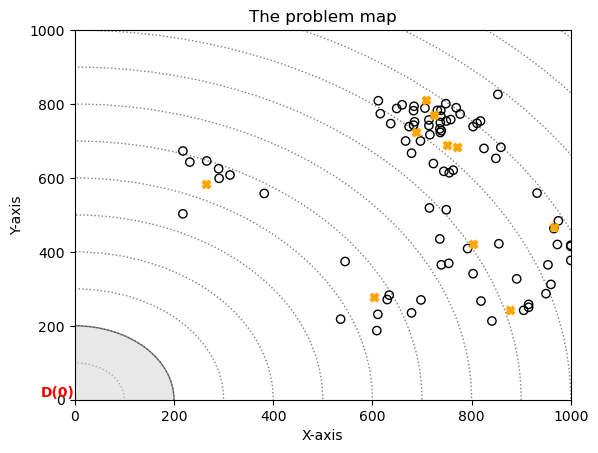

In [ ]:
%run Model.ipynb

In [1]:
problems = load_problems("/Users/simonhusebo/Dokumenter/MASTERS CODE/data")

NameError: name 'load_problems' is not defined

Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)]


<Axes: title={'center': 'The problem map'}, xlabel='X-axis', ylabel='Y-axis'>

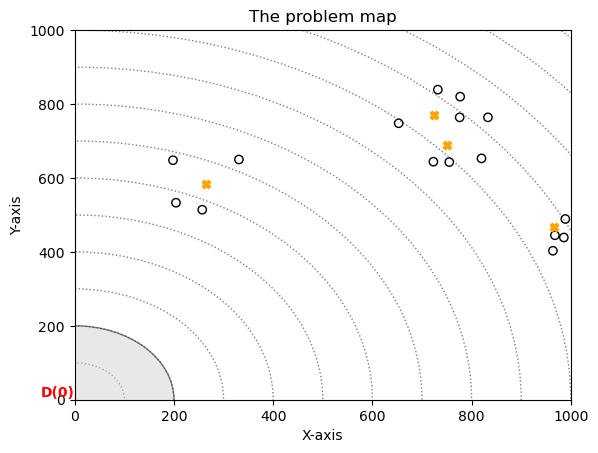

In [6]:
problem = problems[0]
n_trips = problem['N_trips']
initial = initial_solution(problem,n_trips)
operators = [random_remove_greedy_insert,largest_trip_remove_greedy_insert,similarity_removal_greedy_insert,clustering_removal_kncs_greedy_insert,clustering_removal_krd_greedy_insert]
probabilities = [1/3,1/3,1/3]
show_the_map(problem)

In [7]:
#sol,cost,n_feasible,cost_movement = simple_sim_annealing(inital,problem,operators,probabilities)

In [14]:
best_solution,processed_best,best_cost,best_costs,costs,all_weights,all_scores,all_used,final_improvement,unique,accept_list = ALNS(initial,problem,operators)

: 

NameError: name 'processed_best' is not defined

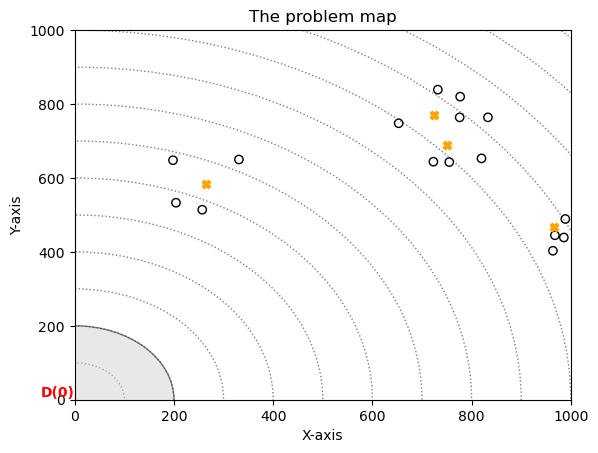

In [8]:
# Create the base map
ax = show_the_map(problem)

# Plot all trips on the map
ax = plot_all_trips(ax, processed_best, problem)

# Display the combined plot
plt.show()

NameError: name 'processed_best' is not defined

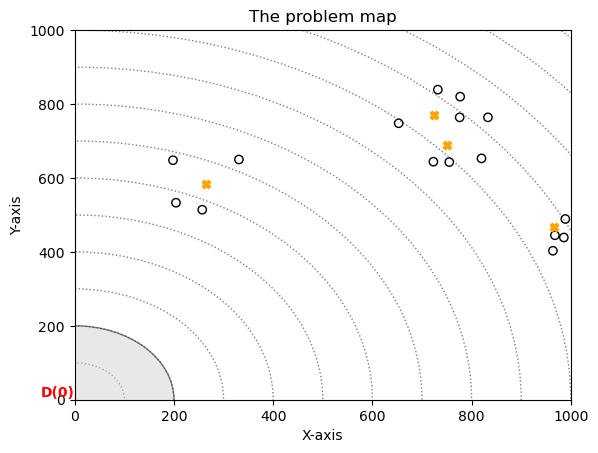

In [9]:
bx = show_the_map(problem)

bx = plot_some_trips(bx, processed_best, problem,1)

plt.show()

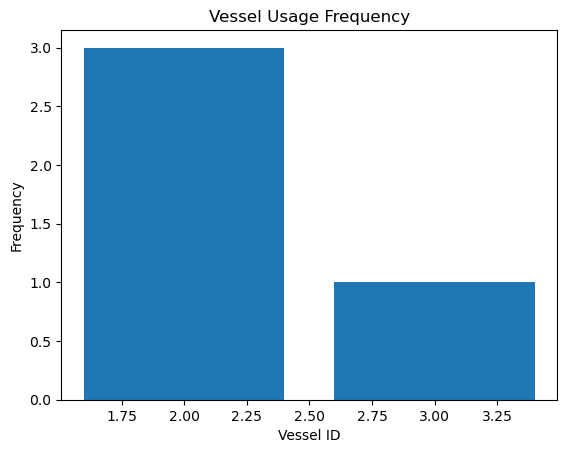

In [ ]:
show_vessel_distribution(processed_best)

In [10]:
plot_costs(costs)

NameError: name 'costs' is not defined

In [11]:
plot_costs(best_costs)

NameError: name 'best_costs' is not defined

In [12]:
multiple_plots(costs,accept_list,title='problem1_costs_with_acceptance')

NameError: name 'costs' is not defined

In [13]:
test = accept_list

print(len(accept_list))

coefficients = np.polyfit(range(len(test)), test, 1)
line = np.poly1d(coefficients)
plt.plot(range(len(test)), line(test), 'r-')
# Create the equation string
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
print(equation)

NameError: name 'accept_list' is not defined

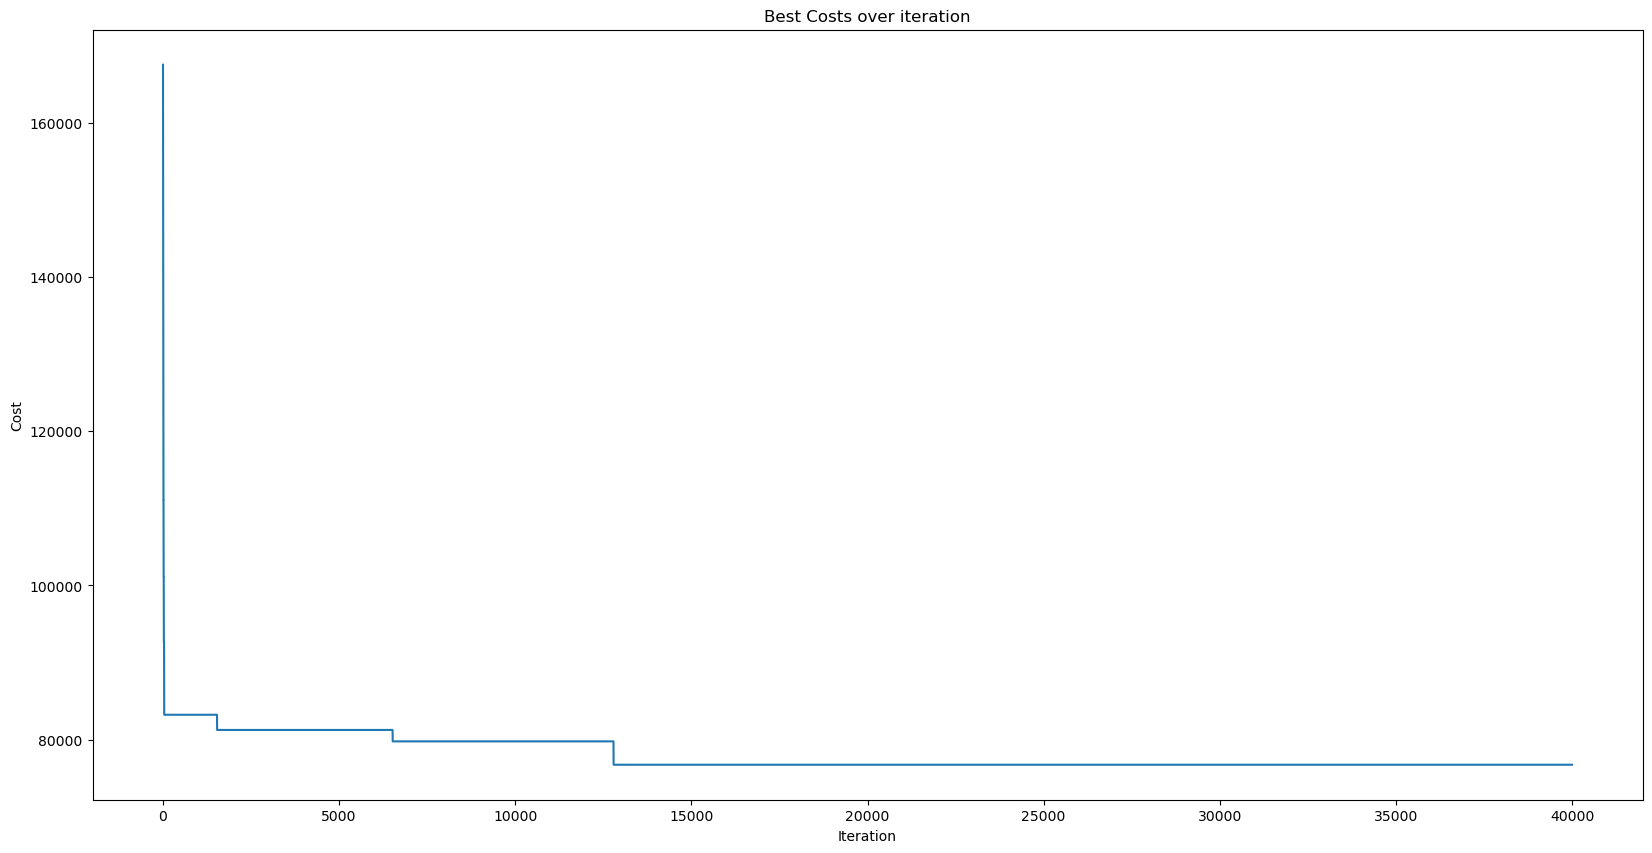

<Axes: title={'center': 'Best Costs over iteration'}, xlabel='Iteration', ylabel='Cost'>

In [262]:
plot_costs(best_costs,title='Best Costs over iteration')

In [263]:
best_solution

[(5, 0),
 (5, 1),
 (20, 0),
 (20, 1),
 (7, 0),
 (19, 1),
 (16, 0),
 (14, 1),
 (0, 0),
 (14, 0),
 (11, 1),
 (10, 0),
 (10, 1),
 (12, 0),
 (17, 1),
 (18, 1),
 (0, 0),
 (8, 0),
 (6, 0),
 (11, 0),
 (9, 1),
 (12, 1),
 (15, 0),
 (16, 1),
 (15, 1),
 (0, 0),
 (13, 0),
 (13, 1),
 (18, 0),
 (8, 1),
 (19, 0),
 (9, 0),
 (17, 0),
 (6, 1),
 (7, 1),
 (0, 0)]

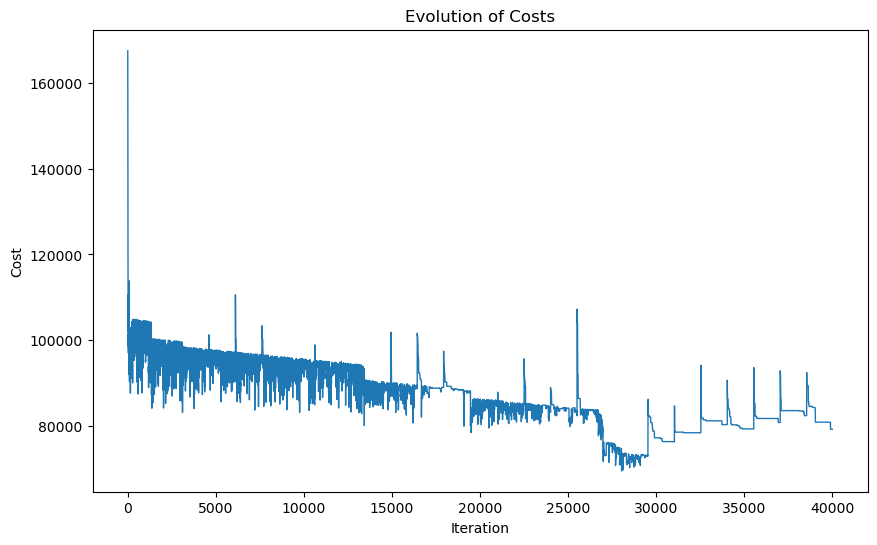

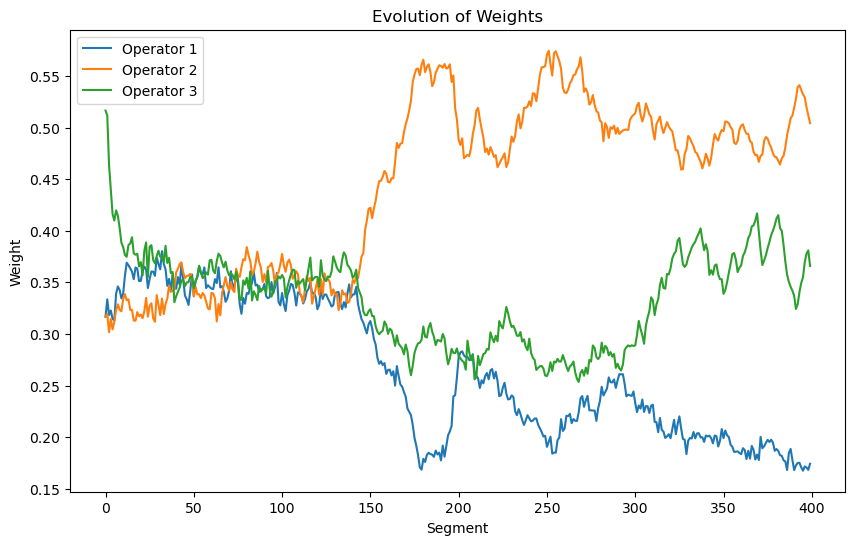

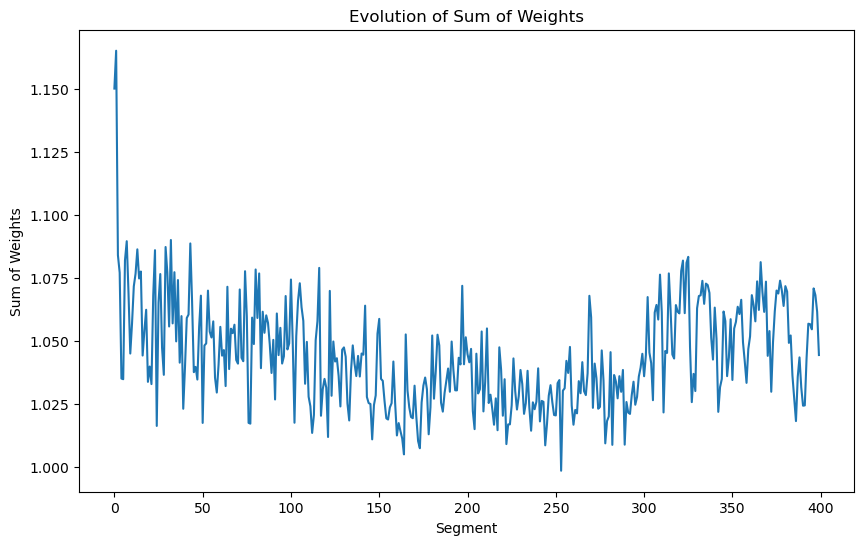

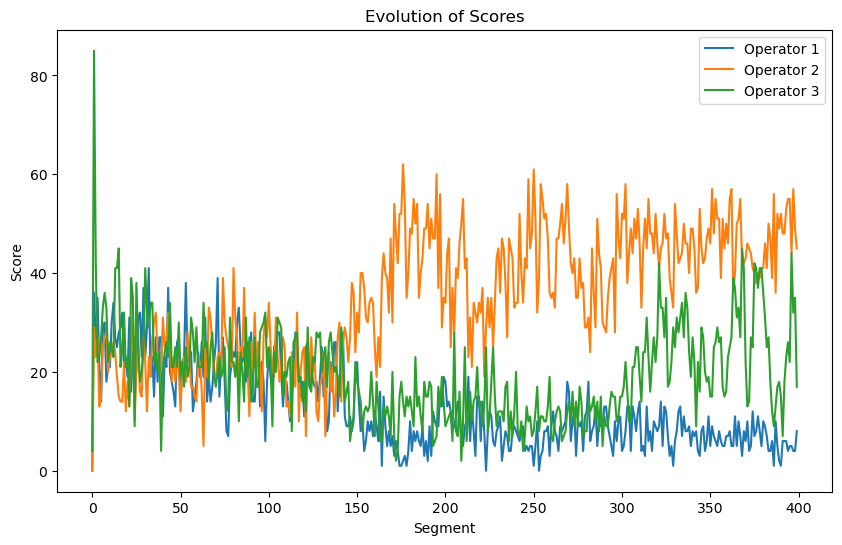

In [120]:
plot_output_lists(costs,all_weights,all_scores)

In [25]:
def multiple_ALNS_runs(initial, problem,operators,n_runs):
    best_solution = initial
    best_cost = objective_function(initial,problem)
    best_costs = []
    cost_lists = []
    improvement_lists = []
    
    for i in range(n_runs):
        print(f'Starting run {i+1}')
        solution,_,cost,improvement,costs,_,_,_,_,_ = ALNS(initial,problem,operators)
        cost_lists.append(costs)
        improvement_lists.append(improvement)
        if cost<best_cost:
            best_solution = solution
            best_cost = cost
            best_costs = costs
    
    
    return best_solution,best_cost,best_costs,cost_lists,improvement_lists

In [4]:
def ExperimentI(problem,trip_range):
    
    charge_lists = []
    n_vessels = []
    best_costs = []
    
    
    operators = [random_remove_greedy_insert,largest_trip_remove_greedy_insert,similarity_removal_greedy_insert]
    
    for i in trip_range:
        print(f'Starting iteration with {i} Vessels')
        inital = initial_solution(problem,n_trips=i)
        _,processed_best,best_cost,_,_,_,_,_,_,_ = ALNS(inital,problem,operators)
        charging = processed_best[2]
        charging_amount = sum(len(sublist) for sublist in charging)
        best_costs.append(best_cost)
        charge_lists.append(charging_amount)
        n_vessels.append(i)
        
    return n_vessels,charge_lists,best_costs

Jobs Information:
Turbine ID      Crew Needed    
9               3              
10              5              
11              1              
12              3              
13              6              
14              6              
15              6              
16              8              
17              3              
18              5              
19              5              
20              3              
21              2              
22              2              
23              4              
24              2              
25              6              
26              7              
27              4              
28              4              
29              8              
30              3              
31              5              
32              5              
33              7              
34              3              
35              5              
36              1              
37              2              
38              1     

<Axes: title={'center': 'The problem map'}, xlabel='X-axis', ylabel='Y-axis'>

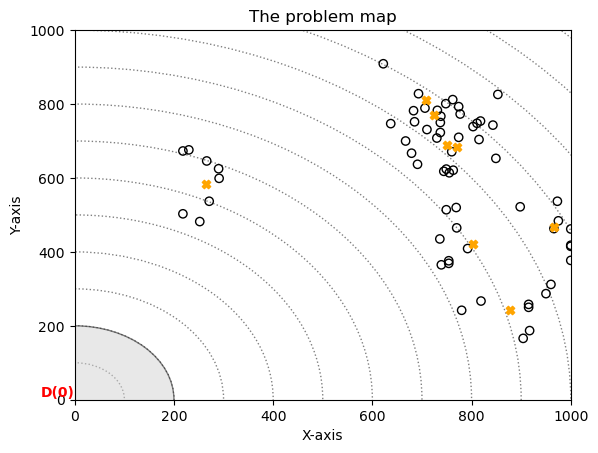

In [20]:
problem = make_problem(n_nodes_per_cluster=8,n_chargers=8)
show_the_map(problem)

In [21]:
n_vessels, chargelist, best_costs = ExperimentI(problem,range(10,31))

Starting iteration with 10 Vessels
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1), (30, 0), (30, 1), (31, 0), (31, 1), (32, 0), (32, 1), (33, 0), (33, 1), (34, 0), (34, 1), (35, 0), (35, 1), (36, 0), (36, 1), (37, 0), (37, 1), (38, 0), (38, 1), (39, 0), (39, 1), (40, 0), (40, 1), (41, 0), (41, 1), (42, 0), (42, 1), (43, 0), (43, 1), (44, 0), (44, 1), (45, 0), (45, 1), (46, 0), (46, 1), (47, 0), (47, 1), (48, 0), (48, 1), (49, 0), (49, 1), (50, 0), (50, 1), (51, 0), (51, 1), (52, 0), (52, 1), (53, 0), (53, 1), (54, 0), (54, 1), (55, 0), (55, 1), (56, 0), (56

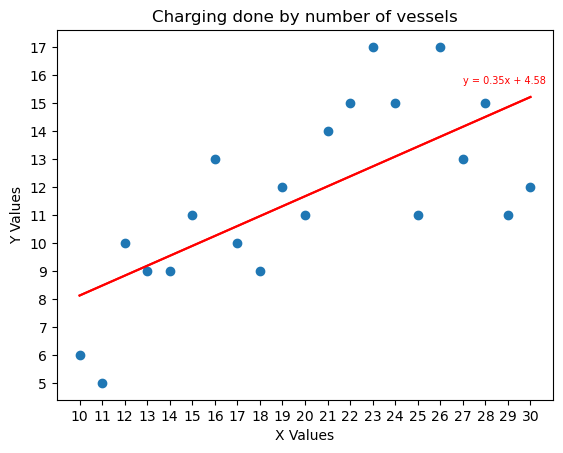

In [46]:


# Create the scatterplot
plt.scatter(n_vessels, chargelist)


# Add labels and title
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Charging done by number of vessels')

xticks = np.arange(min(n_vessels), max(n_vessels)+1, step=1)  # change step value as needed
yticks = np.arange(min(chargelist), max(chargelist)+1, step=1)  # change step value as needed
plt.xticks(xticks)
plt.yticks(yticks)

coefficients = np.polyfit(n_vessels, chargelist, 1)
line = np.poly1d(coefficients)
plt.plot(n_vessels, line(n_vessels), 'r-')
# Create the equation string
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'

# Add the equation to the plot
plt.text(max(n_vessels)-3, line(max(n_vessels))*1.05, equation, fontsize=7,color = 'red', verticalalignment='top')
plt.plot(n_vessels, line(n_vessels), 'r-')

# Display the plot
plt.show()


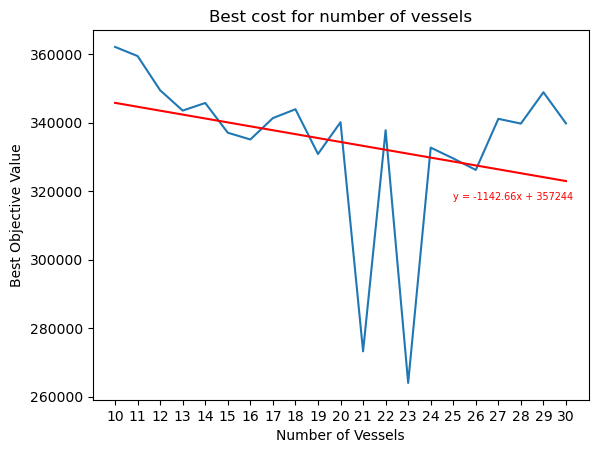

In [45]:
# Create the scatterplot
plt.plot(n_vessels, best_costs)

# Add labels and title
plt.xlabel('Number of Vessels')
plt.ylabel('Best Objective Value')
plt.title('Best cost for number of vessels')

xticks = np.arange(min(n_vessels), max(n_vessels)+1, step=1)  # change step value as needed

plt.xticks(xticks)

coefficients = np.polyfit(n_vessels, best_costs, 1)

line = np.poly1d(coefficients)
# Create the equation string
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.0f}'

# Add the equation to the plot
plt.text(max(n_vessels)-5, line(max(n_vessels))*0.99, equation, fontsize=7,color = 'red', verticalalignment='top')
plt.plot(n_vessels, line(n_vessels), 'r-')

# Display the plot
plt.show()